In [1]:
!pip install facebook-scraper

In [2]:
from facebook_scraper import get_posts


In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
from bs4 import BeautifulSoup

import csv
import spacy
nlp = spacy.load('en_core_web_sm')
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to C:\Users\Ariel
[nltk_data]     Fleiderman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ariel
[nltk_data]     Fleiderman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:271: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.0). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [4]:

#Extract Facebook post using facebook_scrapper. 
from facebook_scraper import get_posts

def social():
    for post in get_posts('BancoDeCordoba', pages=100):
        posts = post['text'][:5000]
        all_text = []
        all_text.append(posts)
        
        outF = open("BancoDeCordoba.csv", "a", encoding='utf8')
        for line in all_text:
            outF.write(line)
            outF.write("\n")
        outF.close()
    return
social()

In [5]:
import csv

read_file = pd.read_csv('BancoDeCordoba.csv', error_bad_lines=False , sep=";" ,encoding='utf-8' )


df = read_file.to_string()
df_split = df.split()
df_split

b'Skipping line 3335: expected 1 fields, saw 2\nSkipping line 3337: expected 1 fields, saw 2\nSkipping line 3370: expected 1 fields, saw 3\nSkipping line 3705: expected 1 fields, saw 2\nSkipping line 3706: expected 1 fields, saw 2\nSkipping line 3710: expected 1 fields, saw 2\nSkipping line 3711: expected 1 fields, saw 2\nSkipping line 3713: expected 1 fields, saw 2\nSkipping line 3771: expected 1 fields, saw 2\nSkipping line 9591: expected 1 fields, saw 2\nSkipping line 9593: expected 1 fields, saw 2\nSkipping line 9626: expected 1 fields, saw 3\nSkipping line 9961: expected 1 fields, saw 2\nSkipping line 9962: expected 1 fields, saw 2\nSkipping line 9966: expected 1 fields, saw 2\nSkipping line 9967: expected 1 fields, saw 2\nSkipping line 9969: expected 1 fields, saw 2\nSkipping line 10027: expected 1 fields, saw 2\n'


['🗓',
 'ATENCIÓN',
 'SEMANA',
 'DEL',
 '26',
 'AL',
 '30',
 'DE',
 'OCTUBRE',
 '0',
 '🧑\u200d💻',
 'Atención',
 'general',
 'solo',
 'con',
 'Turno',
 'Web',
 'a',
 'través',
 'de',
 'www.bancor.com.ar',
 '1',
 '🏦',
 'Cronograma',
 'de',
 'Pago',
 '2',
 'ANSES:',
 'Finaliza',
 'el',
 'pago',
 'a',
 'los',
 'jubilados',
 'y',
 'pensionados',
 'que',
 'perciban',
 'prestaciones',
 'que',
 'superen',
 'los',
 '$20.374:',
 '3',
 '🔹',
 'Lunes',
 '26',
 'de',
 'octubre:',
 'DNI',
 'terminados',
 'en',
 '2',
 'y',
 '3',
 '4',
 '🔹',
 'Martes',
 '27',
 'de',
 'octubre:',
 'DNI',
 'terminados',
 'en',
 '4',
 'y',
 '5',
 '5',
 '🔹',
 'Miércoles',
 '28',
 'de',
 'octubre:',
 'DNI',
 'terminados',
 'en',
 '6',
 'y',
 '7',
 '6',
 '🔹',
 'Jueves',
 '29',
 'de',
 'octubre:',
 'DNI',
 'terminados',
 'en',
 '8',
 'y',
 '9',
 '7',
 '🕣',
 'Horarios:',
 '8',
 'Interior',
 'de',
 'Córdoba:',
 '8:00',
 'a',
 '13:00',
 '9',
 'Rosario:',
 '8:15',
 'a',
 '13:15',
 '10',
 'Córdoba:',
 '8:30',
 'a',
 '13:30',
 '11',

In [6]:
read_file.head(5000)

,🗓 ATENCIÓN SEMANA DEL 26 AL 30 DE OCTUBRE
0,🧑‍💻 Atención general solo con Turno Web a trav...
1,🏦 Cronograma de Pago
2,ANSES: Finaliza el pago a los jubilados y pens...
3,🔹 Lunes 26 de octubre: DNI terminados en 2 y 3
4,🔹 Martes 27 de octubre: DNI terminados en 4 y 5
...,...
4995,🚗 ¡Préstamos Rápidos y Fabulosos para tener tu...
4996,Llevalo De Una! de la concesionaria
4997,▶️ 0 Km hasta 60 meses
4998,▶️ Usados hasta 48 meses


In [7]:
read_file = read_file.rename(columns={'🗓 ATENCIÓN SEMANA DEL 26 AL 30 DE OCTUBRE': 'textos'})


In [8]:
read_file.head(5000)

,textos
0,🧑‍💻 Atención general solo con Turno Web a trav...
1,🏦 Cronograma de Pago
2,ANSES: Finaliza el pago a los jubilados y pens...
3,🔹 Lunes 26 de octubre: DNI terminados en 2 y 3
4,🔹 Martes 27 de octubre: DNI terminados en 4 y 5
...,...
4995,🚗 ¡Préstamos Rápidos y Fabulosos para tener tu...
4996,Llevalo De Una! de la concesionaria
4997,▶️ 0 Km hasta 60 meses
4998,▶️ Usados hasta 48 meses


In [9]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [10]:
read_file['textos'] = read_file['textos'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords.words ('spanish')])   )

In [11]:
from wordcloud import WordCloud

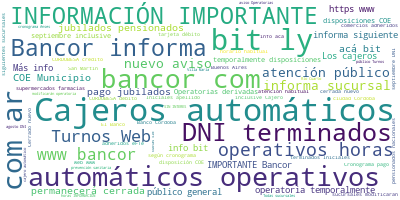

In [12]:
# Join the different processed titles together.
long_string = ','.join(list(read_file['textos'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [23]:
stop_words = set(stopwords.words('spanish'))
stop_words.update(["Bancor informa","DNI terminados", "Cajeros automaticos","com","ar","bit","ly","turnos web","operativos","tenia","iba","ser","estan","https","jajaj","pa", "eh", "si", "no", "ah", "che", "sisi", "sii","siii","aca","ahi","ahí","tmb","encima","re","desp","nah","tan", "siiii","oki","re","dp","porq","xq","tb","do","ma","capaz","so","vo","solo", "https", "http", "www"
                     ,"ary", "bancor","hola"])


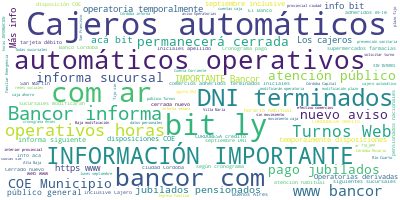

In [24]:
# Join the different processed titles together.
long_string = ','.join(list(read_file['textos'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

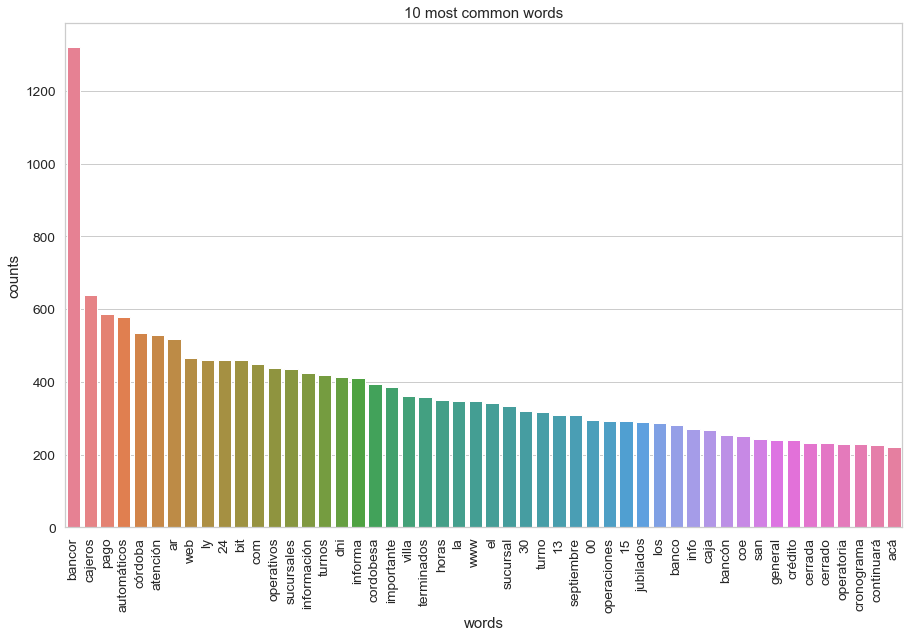

In [52]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(read_file['textos'])

# Visualise the 50 most common words
plot_50_most_common_words(count_data, count_vectorizer)

In [16]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
cordobesa días gas cuotas pago interés sin recepción órdenes documentación

Topic #1:
13 15 30 sucursales córdoba débito efectivo atención efté podés

Topic #2:
atención sucursales automático cajero millones las horario turno centro en

Topic #3:
bancón bancor app operaciones cordobesa crédito digital cliente caja empresa

Topic #4:
bancor com ar turnos web www aviso atención nuevo turno

Topic #5:
importante información villa bancor río maría la san 00 córdoba

Topic #6:
dni terminados septiembre seguridad lunes miércoles bancor cerrado viernes martes

Topic #7:
ly bit info bancor sucursal informa acá cerrada permanecerá más

Topic #8:
pago cronograma jubilados anses pensionados el 12 20 según préstamos

Topic #9:
cajeros automáticos operativos 24 horas 00 los la medidas sanitaria


In [28]:
import emoji
from collections import Counter

In [37]:

def split_count(textos):

    emoji_list = []
    data = textos
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

total_mensajes = read_file.shape[0]
media_mensajes = read_file[read_file['textos'] == 'textos'].shape[0]
read_file["emoji"] =read_file["textos"].apply(split_count)
emojis = sum(read_file['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
read_file['urlcount'] = read_file.textos.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(read_file.urlcount)

In [44]:
total_emojis_list = list([a for b in read_file.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
agregados_emoji = emoji_df[(emoji_df['emoji'] == '♀')|(emoji_df['emoji'] == '🏻')]
emoji_df.drop(agregados_emoji.index, inplace=True)
emoji_df = emoji_df.head(10)
emoji_df

,emoji,count
0,➡,656
1,📍,423
2,⚠,410
3,🔹,404
4,👉,265
5,▶,263
6,🔸,231
7,✔,204
8,👏,198
9,✅,86
